#  Machine learning project notebook

### Student: G00219132 Susan Hudson - Module: Machine Learning & Statistics, GMIT

### Notebook structure

The notebook is split up into the following sections which are based on the project statement requirements.

* Section One - General setup and importation of necessary python libraries/packages and dataset
* Section Two - Descriptive Statistics
* Section Three - Inferential Statistics
* Section Four - Predictive Statistics
* Section Five - references and conclusion

## Section One - Importing libraries and dataset

Below is a list of python packages used in this notebook and the loading of the dataset and conversion to a pandas dataframe.


In [1]:
# Import all necessary python packages for this vnotebook

import matplotlib.pyplot as plt 
#Matplotlib is a Python plotting library and Pyplot is a matplotlib module which provides a MATLAB type interface.
plt.rcParams['figure.figsize'] = [10, 6]  #sets figure sizes for plots
%matplotlib inline  
#command abovr ensures plots display correctly in the notebook
import seaborn as sns  #Seaborn is a Python package used for plotting data.
import pandas as pd  #Pandas is a Python package for use with data frames.
import scipy.stats as ss #statistical functions package
import numpy as np #NumPy is a Python package for mathematical computing
import sklearn.datasets #dataset location
import keras as kr #deep learning library - used for predictive neural networks 

Using TensorFlow backend.


In [2]:
# dataset is imported and converted to a pandas dataframe
sklearn.datasets.load_boston
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

##  Section Two - Descriptive Statistics

Descriptive Statistics looks at sunmary statistics for the population sample [1], to get a 'feel' for the data. I have chosen both visual and quamtitative analysis methods. 
 

In [3]:
# check data set shape and print first five rows 
print(boston.data.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#a table of the summary statistics for all columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [5]:
# below outines the characteristcs of the dataset and explains what each variable represents in the dataset.
# Note - this dataset is from the 1970s and some attributes are a reflection of those times, for the purpose of the project
# I imported the dataset as a whole but will not be considering some of the variables when doing evaluations of data subsets!

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Distribution of Median Values

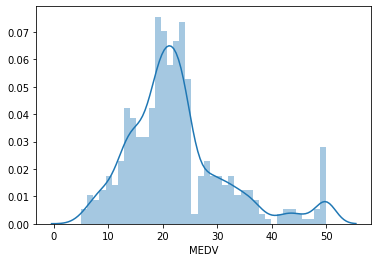

In [6]:
#below I am looking at the distribution of the target variable, MEDV

sns.distplot(df["MEDV"], bins=40)
plt.show()


The plot of Median Value shows a mainly normal distribution. It looks like there is some sort of price capping /banding as there seem to be a disproportionate number of properties with median value 50. 
The box plot of MEDV below appears to back up this opinion. 

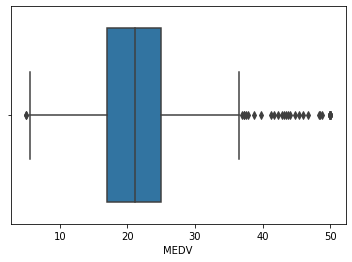

In [7]:
# a box plot of MEDV to look at the shape
sns.boxplot(df.MEDV)

#### Correlation
I then looked at whether there was much, or any correlation between the individual dataset variables and in particular whether any strong correlations existed between target variable MEDV and other variables. 

I did both a correlarion heatmap for a visual display and a correlaion table. 

Correlation is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another. A coefficient close to  1 would indicate that the two change in the same direction, e.g as one increases the other increases, as one decreases the other decreases. A value close to -1 indicates a strong negative correlation, e.g as one variable increases the other decreases. 

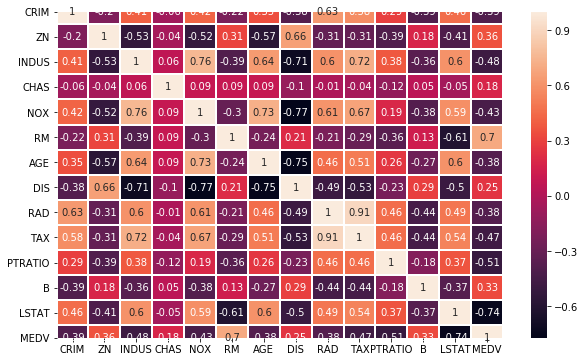

In [8]:
# a correlation heatmap of the dataset

correlation_heatmap = df.corr().round(2)
fig, ax = plt.subplots(figsize=(10,6))   
sns.heatmap(correlation_heatmap, annot=True,linewidths= 1, ax=ax)

plt.show()

In [9]:
# correlation table for the dataset
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Looking at the correlation heatmap/table the strongest correlations with MEDV are a positive correlation with RM, average number of rooms per dwelling and a negative correlation with LSTAT % lower status of the population.
This would make sense as one would imagine that house prices are higher when they are larger and also that they would be lower in poorer areas. This is supported by the negative correlation between LSTAT and RM, the higher the % of 'lower status' the lower the number of rooms. There is also a negative correlation with PTRATIO pupil-teacher ratio by town. It appears that the higher the PTRATIO the lower the MEDV This could imply that areas of lower socio economic status would have higher PTRATIO, it could be attributed to funding or even orevalence of orivate schools in more affluent areas. The posive correlation between LSTAT and PTRATIO could support this observation. 

#### Distribution plots
Below are distribution plots for each variable. Some appear skewed, CRIM, ZN, AGE for example. RM and MEDV are normally distributed.  As CHAS is categorical the distribution shows merely the counts for each value, 1 or 0, worth noting that there are a far greated number at 0. 

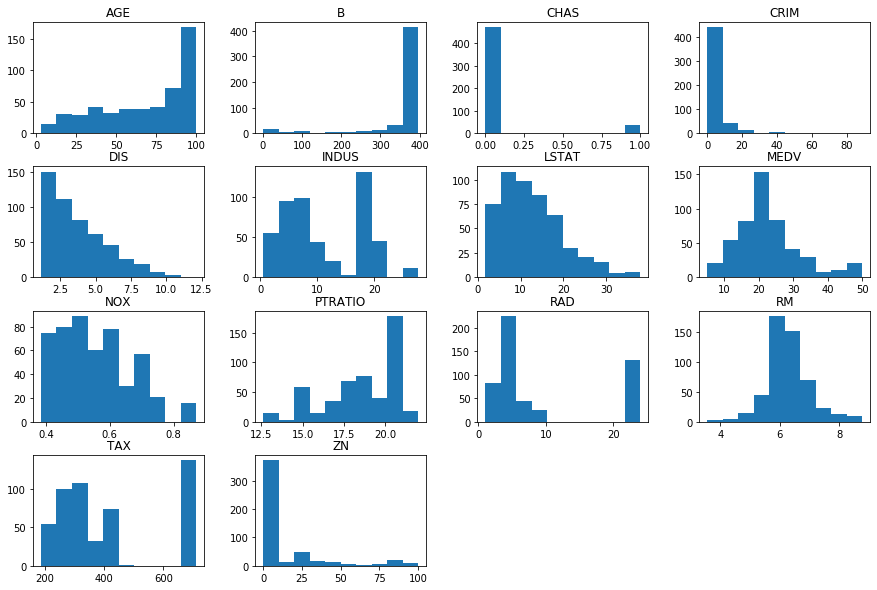

In [10]:
df.hist(bins=10, figsize=(15,10), grid=False)
plt.show()

## Section Three - Inferential Statistics

Inferential statistics looks at the sample and infers trends about the larger population from which the sample was drawn. Where populations are large it would be impossible to get data for the entire population so inferences are made based on the statistical sample. The project brief was to analyse whether there was a sigificant difference in median house prices between houses along the Charles river and those that aren't. 

To do this I decided to do a two sample t test and create two subsets to do a t test to see whether the mean of median values is the same for houses bordering the river and houses not near the river. The null hypothesis I am testing being that there is no difference in the average median value of houses bordering the river and houses not near the river.

The alternative hypothesis being that there is a difference in median values of houses bordering the river and houses not near the river.

In [11]:
# create two subsets to do a t test dfnear, houses bordering the river, dffar houses away from the river

# houses bordering the river
dfnear =  df[(df['CHAS'] == 1.0)]
dfnear.reset_index(inplace= True)
#print ( dfnear)

#houses bordering the river with values of 50k removed
dfnear2 =  df[(df['CHAS'] == 1.0)]
dfnearno_out = dfnear2[(dfnear2['MEDV']<40)]
#print (dfnearno_out)

#houses away from the river
dffar =  df[(df['CHAS'] == 0.0)]
dffar.reset_index(inplace= True)
print(dffar)

# t test houses near and houses away from river
from scipy.stats import ttest_ind
n =dfnear['MEDV']
f =dffar['MEDV']
result = ss.ttest_ind(n,f)
print('t test result for CHAS:  ', result)
# result obtained causes me to reject the hypothesis
n_noout = dfnearno_out['MEDV']

# t test houses near the river excluding values of 50 and houses away from river
from scipy.stats import ttest_ind
dfnearno_out['MEDV']
f =dffar['MEDV']
result = ss.ttest_ind(n_noout,f)
print('t test result for CHAS, no 50k values included:  ', result)


     index     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0        0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1        1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2        2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3        3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4        4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..     ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
466    501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
467    502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
468    503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
469    504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
470    505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO       B  LSTAT  MEDV  
0    296.0     15.3  396.90   4.98  24.0  
1    242.0   

The initial result obtained causes me to reject the null hypothesis and conclude that the mean of median value for houses along the river is not equal to the mean of median values of houses away from the river. However, below I took a further look at the two subsets of data for CHAS. Looking at the distributions I am not convinced that the t test is of any value as I don't feel that the data follows the required conitions for being approximately normal [2]. The sample away from the river is OK but those near the river are a appear to have a distribution with outliers, this appears to be mainly the the 'capped' 50k values. 

Having reviewed the plots I repeated the t test, this time removing values of 50k. The resulting p value of 0.51 would mean that 1 cannot conclude that a significant difference exists. 
However I am sticking with the original rejection on the basis that in this instance removal of outliers is not correct as the outliers are capped values so in all liklihood are 50 and above and in the sample size represent 20% of the total sample so are not insignificant. 




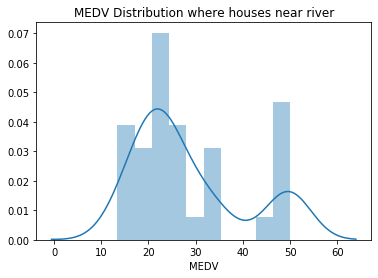

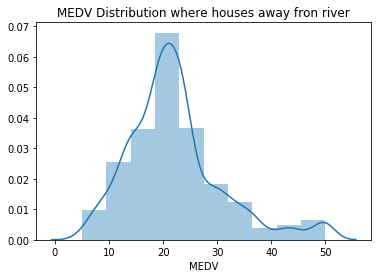

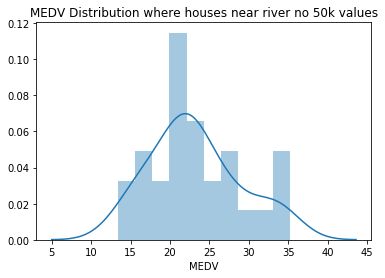

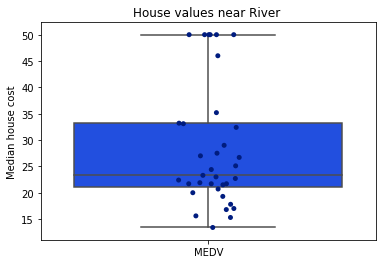

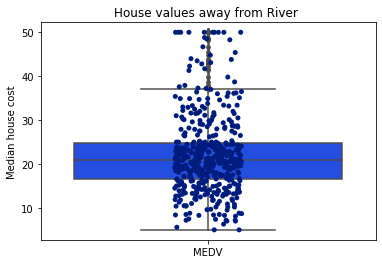

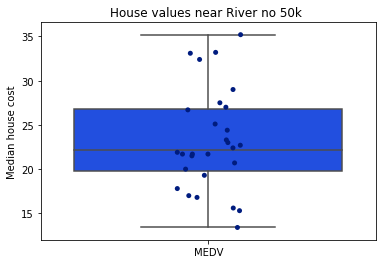

In [12]:
# seaborn distribution plots 

sns.distplot(dfnear["MEDV"], bins=10).set_title ("MEDV Distribution where houses near river")
plt.show()
sns.distplot(dffar["MEDV"], bins=10).set_title ("MEDV Distribution where houses away fron river")
plt.show()
sns.distplot(dfnearno_out["MEDV"], bins=10).set_title ("MEDV Distribution where houses near river no 50k values")
plt.show()

#box plot with stripplot overlaid to show data points
df4 = pd.DataFrame(data = dfnear, columns = [ 'MEDV'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df4), palette="bright").set_title("House values near River ")
sns.stripplot(x="variable", y="value", data= pd.melt(df4), palette="dark").set_title("House values near River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

#box plot with stripplot overlaid to show data points
df5 = pd.DataFrame(data = dffar, columns = [ 'MEDV'] )
sns.stripplot (x="variable", y="value", data= pd.melt(df5), palette="dark").set_title("House values away from River ")
sns.boxplot(x="variable", y="value", data= pd.melt(df5), palette="bright").set_title("House values away from River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

#box plot with stripplot overlaid to show data points
df6 = pd.DataFrame(data = dfnearno_out, columns = [ 'MEDV'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df6), palette="bright").set_title("House values near River no 50k ")
sns.stripplot(x="variable", y="value", data= pd.melt(df6), palette="dark").set_title("House values near River no 50k ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

## Section four - predictive statistics

The brief for this section of the project was to use Keras to build a neural network that could predict the median house price (MEDV) based on the other values in the dataset. There were no other restrictions and I decided to take the following approach. 
* build a neural network and train on all variables, 
* Reduce the number of inputs and train.
* look at some pre processing of data 

Select all variables as inputs and MEDV as output

In [13]:
x = df.iloc[:,0:13]
y = df.iloc[:,13]

### Build neural network model
the neural network I built is a sequential model where layers were added one at a time. 
I experimented wirh different layer densities, activitation functions, initializers and optimizers in the model itself and with different numbers of epochs and batch size when training the model. after much trial and error I settled on the model below, two layers of 64 neurons wrelu activation and an output layer of 1 neuron and linear activation.

This gave the lowest loss values although los values are fluctuating. I increased the batch size to the full dataset when training and could see less fluctations so think they are a result of the number of variables and the differences across variables when batch sizes are relatively small. 

In [14]:
from sklearn.model_selection import train_test_split 
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
m.add(layers.Dense(64, activation='relu', input_dim =13))
m.add(layers.Dense(64, activation='relu'))
#m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))
m.add(layers.Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))
m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    

In [15]:
# split the dataset into test(20%) and train (80%) values
# train the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
m.fit(x_train, y_train, epochs=1000, batch_size=25)

Epoch 1/1000
404/404 [==============================] - 1s 3ms/step - loss: 558.1709 - accuracy: 0.0025
Epoch 2/1000
404/404 [==============================] - 0s 134us/step - loss: 120.0220 - accuracy: 0.0099
Epoch 3/1000
404/404 [==============================] - 0s 671us/step - loss: 75.2139 - accuracy: 0.0099
Epoch 4/1000
404/404 [==============================] - 0s 904us/step - loss: 69.3556 - accuracy: 0.0025
Epoch 5/1000
404/404 [==============================] - 0s 562us/step - loss: 66.6779 - accuracy: 0.0025
Epoch 6/1000
404/404 [==============================] - 0s 978us/step - loss: 64.8859 - accuracy: 0.0050
Epoch 7/1000
404/404 [==============================] - 0s 1ms/step - loss: 64.7684 - accuracy: 0.0000e+00
Epoch 8/1000
404/404 [==============================] - 0s 626us/step - loss: 63.5553 - accuracy: 0.0074
Epoch 9/1000
404/404 [==============================] - 0s 134us/step - loss: 65.1419 - accuracy: 0.0050
Epoch 10/1000
404/404 [==============================

404/404 [==============================] - 0s 233us/step - loss: 21.0190 - accuracy: 0.0074
Epoch 79/1000
404/404 [==============================] - 1s 1ms/step - loss: 19.4422 - accuracy: 0.0099
Epoch 80/1000
404/404 [==============================] - 0s 866us/step - loss: 20.6364 - accuracy: 0.0124
Epoch 81/1000
404/404 [==============================] - 0s 698us/step - loss: 23.4021 - accuracy: 0.0050
Epoch 82/1000
404/404 [==============================] - 0s 1ms/step - loss: 20.5278 - accuracy: 0.0173
Epoch 83/1000
404/404 [==============================] - 0s 448us/step - loss: 18.3105 - accuracy: 0.0099
Epoch 84/1000
404/404 [==============================] - 0s 233us/step - loss: 18.3055 - accuracy: 0.0074
Epoch 85/1000
404/404 [==============================] - 0s 574us/step - loss: 19.2945 - accuracy: 0.0050
Epoch 86/1000
404/404 [==============================] - 0s 718us/step - loss: 17.7855 - accuracy: 0.0173
Epoch 87/1000
404/404 [==============================] - 0s 923u

404/404 [==============================] - 0s 938us/step - loss: 16.4323 - accuracy: 0.0223
Epoch 156/1000
404/404 [==============================] - 0s 188us/step - loss: 14.8666 - accuracy: 0.0149
Epoch 157/1000
404/404 [==============================] - 1s 2ms/step - loss: 16.2638 - accuracy: 0.0223
Epoch 158/1000
404/404 [==============================] - 1s 1ms/step - loss: 18.2117 - accuracy: 0.0223
Epoch 159/1000
404/404 [==============================] - 1s 1ms/step - loss: 14.9054 - accuracy: 0.0223
Epoch 160/1000
404/404 [==============================] - 0s 852us/step - loss: 14.0400 - accuracy: 0.0149
Epoch 161/1000
404/404 [==============================] - 1s 1ms/step - loss: 22.2791 - accuracy: 0.0173
Epoch 162/1000
404/404 [==============================] - 0s 129us/step - loss: 14.1959 - accuracy: 0.0124
Epoch 163/1000
404/404 [==============================] - 0s 800us/step - loss: 14.3459 - accuracy: 0.0099
Epoch 164/1000
404/404 [==============================] - 0s

404/404 [==============================] - 0s 772us/step - loss: 12.4119 - accuracy: 0.0198
Epoch 233/1000
404/404 [==============================] - 1s 2ms/step - loss: 13.0037 - accuracy: 0.0173
Epoch 234/1000
404/404 [==============================] - 0s 406us/step - loss: 18.5181 - accuracy: 0.0149
Epoch 235/1000
404/404 [==============================] - 1s 1ms/step - loss: 12.6206 - accuracy: 0.0272
Epoch 236/1000
404/404 [==============================] - 0s 490us/step - loss: 11.6601 - accuracy: 0.0297
Epoch 237/1000
404/404 [==============================] - 0s 710us/step - loss: 11.4944 - accuracy: 0.0198
Epoch 238/1000
404/404 [==============================] - 1s 2ms/step - loss: 12.0782 - accuracy: 0.0149
Epoch 239/1000
404/404 [==============================] - 0s 792us/step - loss: 11.7695 - accuracy: 0.0322
Epoch 240/1000
404/404 [==============================] - 0s 463us/step - loss: 12.1424 - accuracy: 0.0149
Epoch 241/1000
404/404 [==============================] - 

404/404 [==============================] - 0s 933us/step - loss: 11.4223 - accuracy: 0.0124
Epoch 309/1000
404/404 [==============================] - 0s 1ms/step - loss: 10.2967 - accuracy: 0.0272
Epoch 310/1000
404/404 [==============================] - 0s 626us/step - loss: 10.7630 - accuracy: 0.0173 0s - loss: 10.8821 - accuracy: 0.0
Epoch 311/1000
404/404 [==============================] - 0s 1ms/step - loss: 10.8679 - accuracy: 0.0173
Epoch 312/1000
404/404 [==============================] - 0s 530us/step - loss: 9.8544 - accuracy: 0.0297
Epoch 313/1000
404/404 [==============================] - 0s 995us/step - loss: 10.9671 - accuracy: 0.0272
Epoch 314/1000
404/404 [==============================] - 0s 733us/step - loss: 10.7812 - accuracy: 0.0223
Epoch 315/1000
404/404 [==============================] - 0s 708us/step - loss: 10.4828 - accuracy: 0.0198
Epoch 316/1000
404/404 [==============================] - 0s 735us/step - loss: 10.4850 - accuracy: 0.0198
Epoch 317/1000
404/404

404/404 [==============================] - 0s 300us/step - loss: 10.0426 - accuracy: 0.0173
Epoch 385/1000
404/404 [==============================] - 0s 755us/step - loss: 9.8842 - accuracy: 0.0322
Epoch 386/1000
404/404 [==============================] - 0s 562us/step - loss: 10.1406 - accuracy: 0.0149
Epoch 387/1000
404/404 [==============================] - 0s 448us/step - loss: 10.3234 - accuracy: 0.0347
Epoch 388/1000
404/404 [==============================] - 0s 1ms/step - loss: 10.0579 - accuracy: 0.0223
Epoch 389/1000
404/404 [==============================] - 0s 413us/step - loss: 10.3586 - accuracy: 0.0248
Epoch 390/1000
404/404 [==============================] - 0s 592us/step - loss: 9.7353 - accuracy: 0.0173
Epoch 391/1000
404/404 [==============================] - 0s 121us/step - loss: 10.0721 - accuracy: 0.0074
Epoch 392/1000
404/404 [==============================] - 0s 270us/step - loss: 12.0773 - accuracy: 0.0173
Epoch 393/1000
404/404 [==============================] 

404/404 [==============================] - 0s 953us/step - loss: 9.9135 - accuracy: 0.0272
Epoch 461/1000
404/404 [==============================] - ETA: 0s - loss: 7.8468 - accuracy: 0.02 - 0s 460us/step - loss: 8.2420 - accuracy: 0.0248
Epoch 462/1000
404/404 [==============================] - 0s 468us/step - loss: 9.2818 - accuracy: 0.0248
Epoch 463/1000
404/404 [==============================] - 0s 681us/step - loss: 10.6605 - accuracy: 0.0198
Epoch 464/1000
404/404 [==============================] - 0s 280us/step - loss: 11.5316 - accuracy: 0.0297
Epoch 465/1000
404/404 [==============================] - 0s 802us/step - loss: 9.1325 - accuracy: 0.0223
Epoch 466/1000
404/404 [==============================] - 1s 1ms/step - loss: 8.5927 - accuracy: 0.0297
Epoch 467/1000
404/404 [==============================] - 0s 592us/step - loss: 9.0883 - accuracy: 0.0272
Epoch 468/1000
404/404 [==============================] - 0s 411us/step - loss: 9.6619 - accuracy: 0.0322
Epoch 469/1000
404/

404/404 [==============================] - 0s 334us/step - loss: 7.9176 - accuracy: 0.0272
Epoch 538/1000
404/404 [==============================] - 0s 322us/step - loss: 10.3958 - accuracy: 0.0272
Epoch 539/1000
404/404 [==============================] - 0s 248us/step - loss: 7.7157 - accuracy: 0.0173
Epoch 540/1000
404/404 [==============================] - 1s 1ms/step - loss: 7.1991 - accuracy: 0.0297
Epoch 541/1000
404/404 [==============================] - 1s 1ms/step - loss: 9.6126 - accuracy: 0.0347
Epoch 542/1000
404/404 [==============================] - 0s 517us/step - loss: 8.4428 - accuracy: 0.0223
Epoch 543/1000
404/404 [==============================] - 0s 260us/step - loss: 8.4535 - accuracy: 0.0198
Epoch 544/1000
404/404 [==============================] - 1s 1ms/step - loss: 7.2018 - accuracy: 0.0297
Epoch 545/1000
404/404 [==============================] - 0s 243us/step - loss: 7.5952 - accuracy: 0.0272
Epoch 546/1000
404/404 [==============================] - 0s 114us

404/404 [==============================] - 0s 753us/step - loss: 7.8940 - accuracy: 0.0198
Epoch 615/1000
404/404 [==============================] - 0s 1ms/step - loss: 7.6016 - accuracy: 0.0272
Epoch 616/1000
404/404 [==============================] - 1s 2ms/step - loss: 7.3375 - accuracy: 0.0248
Epoch 617/1000
404/404 [==============================] - 0s 198us/step - loss: 8.1596 - accuracy: 0.0248
Epoch 618/1000
404/404 [==============================] - 0s 795us/step - loss: 7.5817 - accuracy: 0.0248
Epoch 619/1000
404/404 [==============================] - 0s 723us/step - loss: 12.6348 - accuracy: 0.0173
Epoch 620/1000
404/404 [==============================] - 0s 980us/step - loss: 8.7179 - accuracy: 0.0297
Epoch 621/1000
404/404 [==============================] - 1s 2ms/step - loss: 7.2512 - accuracy: 0.0198
Epoch 622/1000
404/404 [==============================] - 0s 495us/step - loss: 6.7096 - accuracy: 0.0297
Epoch 623/1000
404/404 [==============================] - 0s 745us

404/404 [==============================] - 0s 644us/step - loss: 6.8462 - accuracy: 0.0248
Epoch 692/1000
404/404 [==============================] - 0s 292us/step - loss: 7.0045 - accuracy: 0.0272
Epoch 693/1000
404/404 [==============================] - 0s 1ms/step - loss: 6.1587 - accuracy: 0.0272
Epoch 694/1000
404/404 [==============================] - 0s 616us/step - loss: 7.2254 - accuracy: 0.0421
Epoch 695/1000
404/404 [==============================] - 0s 864us/step - loss: 6.7609 - accuracy: 0.0248
Epoch 696/1000
404/404 [==============================] - 0s 896us/step - loss: 6.4172 - accuracy: 0.0297
Epoch 697/1000
404/404 [==============================] - 0s 347us/step - loss: 6.0642 - accuracy: 0.0446
Epoch 698/1000
404/404 [==============================] - 1s 1ms/step - loss: 5.6309 - accuracy: 0.0322
Epoch 699/1000
404/404 [==============================] - 0s 1ms/step - loss: 5.6425 - accuracy: 0.0421
Epoch 700/1000
404/404 [==============================] - 0s 564us/

404/404 [==============================] - 0s 136us/step - loss: 5.4821 - accuracy: 0.0322
Epoch 769/1000
404/404 [==============================] - 0s 280us/step - loss: 5.7225 - accuracy: 0.0248
Epoch 770/1000
404/404 [==============================] - 0s 478us/step - loss: 6.6674 - accuracy: 0.0347
Epoch 771/1000
404/404 [==============================] - 1s 1ms/step - loss: 5.8070 - accuracy: 0.0371
Epoch 772/1000
404/404 [==============================] - 0s 1ms/step - loss: 5.4666 - accuracy: 0.0371
Epoch 773/1000
404/404 [==============================] - 0s 770us/step - loss: 5.2396 - accuracy: 0.0198
Epoch 774/1000
404/404 [==============================] - 0s 421us/step - loss: 5.9456 - accuracy: 0.0173
Epoch 775/1000
404/404 [==============================] - 0s 473us/step - loss: 8.8132 - accuracy: 0.0248
Epoch 776/1000
404/404 [==============================] - 0s 1ms/step - loss: 6.5640 - accuracy: 0.0248
Epoch 777/1000
404/404 [==============================] - 0s 1ms/st

404/404 [==============================] - 0s 688us/step - loss: 5.1998 - accuracy: 0.0223
Epoch 846/1000
404/404 [==============================] - 0s 676us/step - loss: 5.1243 - accuracy: 0.0322
Epoch 847/1000
404/404 [==============================] - 0s 879us/step - loss: 5.7816 - accuracy: 0.0297
Epoch 848/1000
404/404 [==============================] - 0s 968us/step - loss: 5.2744 - accuracy: 0.0223
Epoch 849/1000
404/404 [==============================] - 0s 413us/step - loss: 5.2994 - accuracy: 0.0322
Epoch 850/1000
404/404 [==============================] - 0s 490us/step - loss: 5.8734 - accuracy: 0.0248
Epoch 851/1000
404/404 [==============================] - 0s 302us/step - loss: 5.4020 - accuracy: 0.0446
Epoch 852/1000
404/404 [==============================] - 0s 847us/step - loss: 5.0822 - accuracy: 0.0272
Epoch 853/1000
404/404 [==============================] - 0s 936us/step - loss: 4.6483 - accuracy: 0.0173
Epoch 854/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 495us/step - loss: 4.7590 - accuracy: 0.0173
Epoch 923/1000
404/404 [==============================] - 0s 352us/step - loss: 6.4727 - accuracy: 0.0347
Epoch 924/1000
404/404 [==============================] - 0s 324us/step - loss: 5.1602 - accuracy: 0.0223
Epoch 925/1000
404/404 [==============================] - 0s 455us/step - loss: 5.8150 - accuracy: 0.0322
Epoch 926/1000
404/404 [==============================] - 0s 802us/step - loss: 5.3527 - accuracy: 0.0396
Epoch 927/1000
404/404 [==============================] - 0s 584us/step - loss: 4.9663 - accuracy: 0.0322
Epoch 928/1000
404/404 [==============================] - 0s 993us/step - loss: 4.8314 - accuracy: 0.0371
Epoch 929/1000
404/404 [==============================] - 0s 1ms/step - loss: 4.6920 - accuracy: 0.0297
Epoch 930/1000
404/404 [==============================] - 0s 597us/step - loss: 6.3853 - accuracy: 0.0297
Epoch 931/1000
404/404 [==============================] - 0s 67

404/404 [==============================] - 0s 1ms/step - loss: 4.3278 - accuracy: 0.0421
Epoch 1000/1000
404/404 [==============================] - 0s 1ms/step - loss: 4.1737 - accuracy: 0.0272


In [16]:
#evaluate the model 
print(m.metrics_names)
m.evaluate(x, y)

['loss', 'accuracy']
506/506 [==============================] - 0s 447us/step


[6.259242807923569, 0.03162055462598801]

Using the above trained model I will use the test input variables to predict output variable MEDV for the test portion o f the split dataset. 

In [17]:
# predict using trained model
p = m.predict(x_test)

predictval =  np.around(m.predict(x_test).T,2)
print(predictval)
original = (y_test.as_matrix().astype(np.float32))
print(original)

[[19.96 11.37 34.79 23.   17.91 14.16 27.02 21.09 28.72  6.81 13.86 15.02
  35.66 22.86 12.22 19.5  13.56 21.3  13.09 18.51  6.99 20.58 19.22 14.31
  16.86 23.32 24.52 27.45 16.11 20.57 20.24 20.74 18.87 23.07 15.58  9.61
  47.07 25.36 18.12 32.83 46.05 21.79 21.87 27.67 18.41 15.71 22.54 26.14
  27.51 22.51 20.97 11.31 15.98 21.52 35.76 22.62 24.67 15.75 22.39 14.25
  24.38 16.38 14.06 16.17 21.09 35.18 24.57 17.57 20.3  11.47 18.44 19.08
  20.02 20.39 22.74 20.83 10.2  31.63 12.3  23.69  9.82 11.76 30.56 20.53
  17.84 25.65  5.8  23.16 33.29 24.36 22.48 13.81 31.97 19.16 12.85 18.37
  23.06 27.89 22.54 26.13 12.62 33.47]]
[21.1  8.3 38.7 22.6 15.2 14.9 24.6 18.5 29.   8.5 19.  14.6 31.5 22.
  7.2 22.4 20.2 17.4 13.8 16.4 17.9 21.4 20.1 16.5 18.5 22.6 23.  26.7
 13.1 17.7 21.5 19.2 19.4 20.3 11.7  8.3 48.5 50.  17.6 36.2 45.4 20.7
 22.2 28.4 16.1 19.1 19.4 22.  23.3 21.7 23.9  7.5 19.7 18.9 33.4 23.4
 20.9 23.7 21.6  9.6 27.1 12.5 18.3 13.6 22.2 37.9 21.9 14.4 20.3  8.4
 22.5 21.2 20.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
#evaluate performance of prediction
m.evaluate(x_test, y_test)

102/102 [==============================] - 0s 245us/step


[16.685836268406288, 0.009803921915590763]

looking at the predictions versus the actual and remembering that the figures represent thousands on the surface some predictions appear reasonable - 13 input variables and predictions within 5%. however there are some that are way off and no consistency in prediction versus acual. The training loss value of 6 is a good bit lower than the test loss 16. I decided to see whether reducing the number of input variables would make a difference before I proceeded to do some pre processing and see whether the model output improved. 

#### reducing input variables 
I repeated the above using less input variables and was surprised that performance was worse in terms of ability to be trained, predict. loss evaluation was much higher (42 vs 17) for the prediction.

In [19]:
# now going to repeat the above using the four inputs of most interest
Y=df['MEDV']
#print(Y)
Xfour =df[['RM', 'LSTAT','PTRATIO' ]]
#print(Xfour)

In [20]:
# after an initial run I tweaked the neural network to try to reduce loss
m = models.Sequential()
m.add(layers.Dense(39, activation='relu', input_dim =3))
m.add(layers.Dense(39, activation='relu'))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))

m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(Xfour, Y, test_size=0.2)
m.fit(x_train, y_train, epochs=1000, batch_size=22)

Epoch 1/1000
404/404 [==============================] - 1s 3ms/step - loss: 521.7831 - accuracy: 0.0000e+00
Epoch 2/1000
404/404 [==============================] - 0s 616us/step - loss: 448.4090 - accuracy: 0.0000e+00
Epoch 3/1000
404/404 [==============================] - 0s 663us/step - loss: 349.8184 - accuracy: 0.0000e+00
Epoch 4/1000
404/404 [==============================] - 0s 913us/step - loss: 223.1352 - accuracy: 0.0050
Epoch 5/1000
404/404 [==============================] - 0s 594us/step - loss: 142.5469 - accuracy: 0.0099
Epoch 6/1000
404/404 [==============================] - 0s 923us/step - loss: 127.5785 - accuracy: 0.0025
Epoch 7/1000
404/404 [==============================] - 0s 631us/step - loss: 119.0453 - accuracy: 0.0074
Epoch 8/1000
404/404 [==============================] - 0s 1ms/step - loss: 110.5767 - accuracy: 0.0025
Epoch 9/1000
404/404 [==============================] - 0s 639us/step - loss: 101.7000 - accuracy: 0.0050
Epoch 10/1000
404/404 [===============

404/404 [==============================] - 0s 1ms/step - loss: 21.0293 - accuracy: 0.0099
Epoch 79/1000
404/404 [==============================] - 0s 1ms/step - loss: 21.1172 - accuracy: 0.0124
Epoch 80/1000
404/404 [==============================] - 0s 896us/step - loss: 21.0201 - accuracy: 0.0124
Epoch 81/1000
404/404 [==============================] - 0s 438us/step - loss: 22.0004 - accuracy: 0.0050
Epoch 82/1000
404/404 [==============================] - 0s 891us/step - loss: 21.8020 - accuracy: 0.0050
Epoch 83/1000
404/404 [==============================] - 0s 446us/step - loss: 20.9449 - accuracy: 0.0099
Epoch 84/1000
404/404 [==============================] - 0s 243us/step - loss: 20.7268 - accuracy: 0.0074
Epoch 85/1000
404/404 [==============================] - 0s 1ms/step - loss: 20.8030 - accuracy: 0.0149
Epoch 86/1000
404/404 [==============================] - 0s 686us/step - loss: 20.6418 - accuracy: 0.0099
Epoch 87/1000
404/404 [==============================] - 0s 698us/

404/404 [==============================] - 0s 455us/step - loss: 19.2321 - accuracy: 0.0124
Epoch 155/1000
404/404 [==============================] - 1s 1ms/step - loss: 19.2273 - accuracy: 0.0124
Epoch 156/1000
404/404 [==============================] - 0s 770us/step - loss: 19.0785 - accuracy: 0.0124
Epoch 157/1000
404/404 [==============================] - 0s 671us/step - loss: 20.1667 - accuracy: 0.0248
Epoch 158/1000
404/404 [==============================] - 0s 329us/step - loss: 19.4272 - accuracy: 0.0099
Epoch 159/1000
404/404 [==============================] - 0s 770us/step - loss: 19.2900 - accuracy: 0.0149
Epoch 160/1000
404/404 [==============================] - 0s 864us/step - loss: 19.6004 - accuracy: 0.0050
Epoch 161/1000
404/404 [==============================] - 0s 399us/step - loss: 19.8821 - accuracy: 0.0099
Epoch 162/1000
404/404 [==============================] - 0s 599us/step - loss: 19.5259 - accuracy: 0.0099
Epoch 163/1000
404/404 [==============================

404/404 [==============================] - 0s 993us/step - loss: 18.9216 - accuracy: 0.0173
Epoch 232/1000
404/404 [==============================] - 0s 775us/step - loss: 18.9127 - accuracy: 0.0223
Epoch 233/1000
404/404 [==============================] - 0s 629us/step - loss: 18.8143 - accuracy: 0.0124
Epoch 234/1000
404/404 [==============================] - 0s 579us/step - loss: 18.8738 - accuracy: 0.0099
Epoch 235/1000
404/404 [==============================] - 0s 933us/step - loss: 18.8390 - accuracy: 0.0149
Epoch 236/1000
404/404 [==============================] - 0s 1ms/step - loss: 19.1563 - accuracy: 0.0099
Epoch 237/1000
404/404 [==============================] - 0s 183us/step - loss: 19.0689 - accuracy: 0.0149
Epoch 238/1000
404/404 [==============================] - 0s 1ms/step - loss: 19.0598 - accuracy: 0.0099
Epoch 239/1000
404/404 [==============================] - 0s 1ms/step - loss: 19.1054 - accuracy: 0.0149
Epoch 240/1000
404/404 [==============================] - 

404/404 [==============================] - 1s 1ms/step - loss: 19.0628 - accuracy: 0.0099
Epoch 308/1000
404/404 [==============================] - 0s 701us/step - loss: 18.5863 - accuracy: 0.0124
Epoch 309/1000
404/404 [==============================] - 0s 505us/step - loss: 18.6943 - accuracy: 0.0173
Epoch 310/1000
404/404 [==============================] - 0s 1ms/step - loss: 19.1716 - accuracy: 0.0124
Epoch 311/1000
404/404 [==============================] - 0s 428us/step - loss: 18.8649 - accuracy: 0.0173
Epoch 312/1000
404/404 [==============================] - 0s 978us/step - loss: 18.6242 - accuracy: 0.0099
Epoch 313/1000
404/404 [==============================] - 0s 257us/step - loss: 19.4739 - accuracy: 0.0124
Epoch 314/1000
404/404 [==============================] - 0s 250us/step - loss: 18.9314 - accuracy: 0.0124
Epoch 315/1000
404/404 [==============================] - 0s 438us/step - loss: 19.1763 - accuracy: 0.0099
Epoch 316/1000
404/404 [==============================] 

404/404 [==============================] - 0s 745us/step - loss: 18.7689 - accuracy: 0.0074
Epoch 384/1000
404/404 [==============================] - 0s 592us/step - loss: 18.5631 - accuracy: 0.0223
Epoch 385/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.8882 - accuracy: 0.0149
Epoch 386/1000
404/404 [==============================] - 0s 364us/step - loss: 18.8829 - accuracy: 0.0149
Epoch 387/1000
404/404 [==============================] - 0s 262us/step - loss: 18.6628 - accuracy: 0.0149
Epoch 388/1000
404/404 [==============================] - 1s 2ms/step - loss: 18.6344 - accuracy: 0.0124
Epoch 389/1000
404/404 [==============================] - 1s 1ms/step - loss: 18.5868 - accuracy: 0.0173
Epoch 390/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.5907 - accuracy: 0.0124
Epoch 391/1000
404/404 [==============================] - 1s 2ms/step - loss: 18.5789 - accuracy: 0.0149
Epoch 392/1000
404/404 [==============================] - 0s 9

404/404 [==============================] - 0s 884us/step - loss: 18.4197 - accuracy: 0.0198
Epoch 460/1000
404/404 [==============================] - 0s 503us/step - loss: 18.4326 - accuracy: 0.0149
Epoch 461/1000
404/404 [==============================] - 0s 205us/step - loss: 18.3531 - accuracy: 0.0124
Epoch 462/1000
404/404 [==============================] - 0s 218us/step - loss: 18.5165 - accuracy: 0.0124
Epoch 463/1000
404/404 [==============================] - 0s 166us/step - loss: 18.7599 - accuracy: 0.0173
Epoch 464/1000
404/404 [==============================] - 0s 485us/step - loss: 18.3592 - accuracy: 0.0173
Epoch 465/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.9885 - accuracy: 0.0074
Epoch 466/1000
404/404 [==============================] - 0s 584us/step - loss: 18.7664 - accuracy: 0.0124
Epoch 467/1000
404/404 [==============================] - 0s 418us/step - loss: 18.5539 - accuracy: 0.0149
Epoch 468/1000
404/404 [==============================

404/404 [==============================] - 0s 1ms/step - loss: 18.7567 - accuracy: 0.0149
Epoch 536/1000
404/404 [==============================] - 0s 131us/step - loss: 18.5519 - accuracy: 0.0050
Epoch 537/1000
404/404 [==============================] - 0s 134us/step - loss: 18.9355 - accuracy: 0.0025
Epoch 538/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.4299 - accuracy: 0.0074
Epoch 539/1000
404/404 [==============================] - 1s 2ms/step - loss: 18.3870 - accuracy: 0.0099
Epoch 540/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.5497 - accuracy: 0.0099
Epoch 541/1000
404/404 [==============================] - 1s 1ms/step - loss: 18.4550 - accuracy: 0.0173
Epoch 542/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.3435 - accuracy: 0.0149
Epoch 543/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.9711 - accuracy: 0.0099
Epoch 544/1000
404/404 [==============================] - 0s 131us

404/404 [==============================] - 0s 522us/step - loss: 18.6859 - accuracy: 0.0050
Epoch 612/1000
404/404 [==============================] - 0s 594us/step - loss: 18.1337 - accuracy: 0.0099
Epoch 613/1000
404/404 [==============================] - 0s 713us/step - loss: 18.6905 - accuracy: 0.0149
Epoch 614/1000
404/404 [==============================] - ETA: 0s - loss: 19.4549 - accuracy: 0.0114 - 0s 629us/step - loss: 18.3694 - accuracy: 0.0074
Epoch 615/1000
404/404 [==============================] - 0s 604us/step - loss: 18.3017 - accuracy: 0.0149
Epoch 616/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.3007 - accuracy: 0.0173
Epoch 617/1000
404/404 [==============================] - 0s 792us/step - loss: 18.6417 - accuracy: 0.0149
Epoch 618/1000
404/404 [==============================] - 0s 866us/step - loss: 18.4886 - accuracy: 0.0099
Epoch 619/1000
404/404 [==============================] - 0s 614us/step - loss: 18.8257 - accuracy: 0.0124
Epoch 620

404/404 [==============================] - 0s 671us/step - loss: 18.1454 - accuracy: 0.0124
Epoch 687/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.2951 - accuracy: 0.0124
Epoch 688/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.2858 - accuracy: 0.0149
Epoch 689/1000
404/404 [==============================] - 1s 1ms/step - loss: 18.5169 - accuracy: 0.0149
Epoch 690/1000
404/404 [==============================] - 0s 720us/step - loss: 18.4278 - accuracy: 0.0050
Epoch 691/1000
404/404 [==============================] - 0s 614us/step - loss: 18.2892 - accuracy: 0.0173
Epoch 692/1000
404/404 [==============================] - 0s 364us/step - loss: 18.2701 - accuracy: 0.0074
Epoch 693/1000
404/404 [==============================] - 1s 1ms/step - loss: 18.2929 - accuracy: 0.0149
Epoch 694/1000
404/404 [==============================] - 1s 2ms/step - loss: 18.8156 - accuracy: 0.0149
Epoch 695/1000
404/404 [==============================] - 0s 1

404/404 [==============================] - 0s 822us/step - loss: 18.7331 - accuracy: 0.0149
Epoch 764/1000
404/404 [==============================] - 0s 344us/step - loss: 18.4354 - accuracy: 0.0124
Epoch 765/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.8253 - accuracy: 0.0149
Epoch 766/1000
404/404 [==============================] - 0s 181us/step - loss: 18.2378 - accuracy: 0.0198
Epoch 767/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.5080 - accuracy: 0.0124
Epoch 768/1000
404/404 [==============================] - 0s 780us/step - loss: 18.2485 - accuracy: 0.0124
Epoch 769/1000
404/404 [==============================] - 0s 191us/step - loss: 18.7065 - accuracy: 0.0173
Epoch 770/1000
404/404 [==============================] - 0s 141us/step - loss: 18.2312 - accuracy: 0.0124
Epoch 771/1000
404/404 [==============================] - 0s 139us/step - loss: 18.1846 - accuracy: 0.0198
Epoch 772/1000
404/404 [==============================] 

404/404 [==============================] - 0s 1ms/step - loss: 18.3968 - accuracy: 0.0124
Epoch 841/1000
404/404 [==============================] - 0s 938us/step - loss: 18.1726 - accuracy: 0.0124
Epoch 842/1000
404/404 [==============================] - 0s 134us/step - loss: 18.2378 - accuracy: 0.0050
Epoch 843/1000
404/404 [==============================] - 0s 411us/step - loss: 18.2085 - accuracy: 0.0124
Epoch 844/1000
404/404 [==============================] - 0s 220us/step - loss: 18.2876 - accuracy: 0.0124
Epoch 845/1000
404/404 [==============================] - 0s 629us/step - loss: 18.6059 - accuracy: 0.0223
Epoch 846/1000
404/404 [==============================] - 0s 993us/step - loss: 18.6581 - accuracy: 0.0099
Epoch 847/1000
404/404 [==============================] - 1s 2ms/step - loss: 18.3840 - accuracy: 0.0099
Epoch 848/1000
404/404 [==============================] - 0s 193us/step - loss: 18.1270 - accuracy: 0.0173
Epoch 849/1000
404/404 [==============================] 

404/404 [==============================] - 0s 314us/step - loss: 18.4118 - accuracy: 0.0149
Epoch 917/1000
404/404 [==============================] - 1s 2ms/step - loss: 18.4410 - accuracy: 0.0173
Epoch 918/1000
404/404 [==============================] - 0s 795us/step - loss: 18.2699 - accuracy: 0.0124
Epoch 919/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.7145 - accuracy: 0.0124
Epoch 920/1000
404/404 [==============================] - 1s 2ms/step - loss: 18.5574 - accuracy: 0.0050
Epoch 921/1000
404/404 [==============================] - 0s 582us/step - loss: 18.0943 - accuracy: 0.0124
Epoch 922/1000
404/404 [==============================] - 1s 2ms/step - loss: 18.0680 - accuracy: 0.0149
Epoch 923/1000
404/404 [==============================] - 0s 790us/step - loss: 17.9024 - accuracy: 0.0099
Epoch 924/1000
404/404 [==============================] - 0s 1ms/step - loss: 18.2891 - accuracy: 0.0198
Epoch 925/1000
404/404 [==============================] - 0s 1

404/404 [==============================] - 0s 572us/step - loss: 18.0189 - accuracy: 0.0074
Epoch 994/1000
404/404 [==============================] - 0s 272us/step - loss: 18.6584 - accuracy: 0.0173
Epoch 995/1000
404/404 [==============================] - 0s 483us/step - loss: 17.9257 - accuracy: 0.0223
Epoch 996/1000
404/404 [==============================] - 0s 708us/step - loss: 18.8989 - accuracy: 0.0198
Epoch 997/1000
404/404 [==============================] - 0s 621us/step - loss: 18.4969 - accuracy: 0.0099
Epoch 998/1000
404/404 [==============================] - 0s 941us/step - loss: 18.1627 - accuracy: 0.0173ETA: 0s - loss: 15.3021 - accuracy: 0.0
Epoch 999/1000
404/404 [==============================] - 0s 891us/step - loss: 18.0999 - accuracy: 0.0124
Epoch 1000/1000
404/404 [==============================] - 0s 364us/step - loss: 18.0860 - accuracy: 0.0099


In [22]:
print(m.metrics_names)
m.evaluate(Xfour, Y)

['loss', 'accuracy']
506/506 [==============================] - 0s 743us/step


[17.80607966848984, 0.017786560580134392]

In [23]:
m.predict(x_test)
#m.summary()

predictval =  np.around(m.predict(x_test).T,2)
print(predictval)
output = (y_test.as_matrix().astype(np.float32))
print(output)
round(np.sqrt(np.sum((m.predict(x_test).T -output)**2)))

[[21.96 30.93 32.3  20.23 16.47 29.31 38.7  34.44 31.04 45.51 15.99 47.19
  15.78 24.77 15.27 18.99 18.61 11.   24.65 48.25 19.84 24.68 51.09 26.99
  21.02 22.04 22.09 39.27 29.6  35.96 25.65 11.75 22.66 23.58 10.37 45.28
  24.37 16.77 25.29 40.75 11.24 31.25 21.61 28.18 40.96 50.56 24.99 19.01
  20.05 32.2  12.65 16.03 36.09 33.86 23.63 12.87 21.29 16.22 11.44 21.69
  13.94 28.08 20.55 25.6  32.22 17.4  22.29 45.88 16.73 13.64 25.04 21.92
  16.34 10.97 10.66 21.96 19.92 27.32 26.21 12.49 34.24 26.66 19.08 19.66
  21.11 12.15 34.33 17.08 20.84 28.6  18.16 18.01 31.68 12.82 10.32 12.34
  24.87 16.04 21.2  16.24 18.44 28.35]]
[19.  29.8 50.  21.7 21.7 22.5 34.6 34.9 33.2 37.6  8.4 48.8 12.1 22.3
 15.2 17.5 19.4 10.5 21.9 50.  22.6 25.  50.  33.  19.8 20.6 23.  43.1
 28.7 50.  24.1 23.7 23.1 23.9 19.3 50.  22.9 13.3 27.5 34.9 11.3 32.2
 22.6 23.9 38.7 50.  26.4 13.4 21.  37.9 13.4 13.1 36.5 32.9 23.4  8.4
 18.5 17.2  7.4 21.  13.6 23.5 24.3 24.6 33.1 26.4 18.5 43.5 17.8 16.3
 23.1 20.5 14

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


42.0

### Pre Processing of Data for Keras
I will now investigate whether pre processing the data (using all 13 inputs) makes any significant difference to the performance of the model. I will scale and run through model and then whiten and run through model.

In [24]:
from sklearn.model_selection import train_test_split 

In [25]:
#preprocessing of all dataset[]
# scaling 
import sklearn.preprocessing as pre
xscale = pd.DataFrame(pre.scale(x), columns = x.columns)
xscale
yscale = pd.DataFrame(pre.scale(y))
#xscale, yscale

#### fitting and transforming

In [26]:
scaler=pre.StandardScaler()
scaler.fit(x)
x
scaler.mean_ , x.std()

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]), CRIM         8.601545
 ZN          23.322453
 INDUS        6.860353
 CHAS         0.253994
 NOX          0.115878
 RM           0.702617
 AGE         28.148861
 DIS          2.105710
 RAD          8.707259
 TAX        168.537116
 PTRATIO      2.164946
 B           91.294864
 LSTAT        7.141062
 dtype: float64)

In [27]:
xscale = pd.DataFrame(scaler.transform(x), columns = x.columns)
xscale

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [28]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
m.add(layers.Dense(64, activation='relu', input_dim =13))
m.add(layers.Dense(64, activation='relu', input_dim =13))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))

m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(xscale, y, test_size = 0.2)
m.fit(X_train, Y_train, epochs=1000, batch_size=22)


Epoch 1/1000
404/404 [==============================] - 1s 3ms/step - loss: 577.4152 - accuracy: 0.0000e+00
Epoch 2/1000
404/404 [==============================] - 0s 881us/step - loss: 542.9845 - accuracy: 0.0000e+00
Epoch 3/1000
404/404 [==============================] - 0s 713us/step - loss: 465.9392 - accuracy: 0.0000e+00
Epoch 4/1000
404/404 [==============================] - 0s 654us/step - loss: 323.9001 - accuracy: 0.0000e+00
Epoch 5/1000
404/404 [==============================] - 0s 753us/step - loss: 147.5447 - accuracy: 0.0000e+00
Epoch 6/1000
404/404 [==============================] - 0s 426us/step - loss: 67.4537 - accuracy: 0.0050
Epoch 7/1000
404/404 [==============================] - 1s 1ms/step - loss: 46.2304 - accuracy: 0.0050
Epoch 8/1000
404/404 [==============================] - 0s 723us/step - loss: 34.1982 - accuracy: 0.0099
Epoch 9/1000
404/404 [==============================] - 0s 131us/step - loss: 28.5294 - accuracy: 0.0025
Epoch 10/1000
404/404 [===========

404/404 [==============================] - 0s 339us/step - loss: 7.4162 - accuracy: 0.0223
Epoch 79/1000
404/404 [==============================] - 0s 1ms/step - loss: 7.2669 - accuracy: 0.0248
Epoch 80/1000
404/404 [==============================] - 1s 1ms/step - loss: 7.4034 - accuracy: 0.0173
Epoch 81/1000
404/404 [==============================] - 0s 973us/step - loss: 7.1597 - accuracy: 0.0248
Epoch 82/1000
404/404 [==============================] - 0s 626us/step - loss: 7.2363 - accuracy: 0.0297
Epoch 83/1000
404/404 [==============================] - 0s 829us/step - loss: 7.2623 - accuracy: 0.0223
Epoch 84/1000
404/404 [==============================] - 1s 1ms/step - loss: 7.1201 - accuracy: 0.0173
Epoch 85/1000
404/404 [==============================] - 1s 1ms/step - loss: 7.0210 - accuracy: 0.0297
Epoch 86/1000
404/404 [==============================] - 0s 658us/step - loss: 6.9782 - accuracy: 0.0272
Epoch 87/1000
404/404 [==============================] - 0s 1ms/step - loss: 

404/404 [==============================] - 0s 631us/step - loss: 4.5954 - accuracy: 0.0173
Epoch 157/1000
404/404 [==============================] - 0s 1ms/step - loss: 4.6048 - accuracy: 0.0223
Epoch 158/1000
404/404 [==============================] - 0s 1ms/step - loss: 4.4885 - accuracy: 0.0124
Epoch 159/1000
404/404 [==============================] - 0s 1ms/step - loss: 4.5849 - accuracy: 0.0248
Epoch 160/1000
404/404 [==============================] - 0s 634us/step - loss: 4.3114 - accuracy: 0.0248
Epoch 161/1000
404/404 [==============================] - 0s 787us/step - loss: 4.3679 - accuracy: 0.0347
Epoch 162/1000
404/404 [==============================] - 1s 1ms/step - loss: 4.3505 - accuracy: 0.0198
Epoch 163/1000
404/404 [==============================] - 0s 161us/step - loss: 4.2847 - accuracy: 0.0248
Epoch 164/1000
404/404 [==============================] - 1s 1ms/step - loss: 4.3086 - accuracy: 0.0297
Epoch 165/1000
404/404 [==============================] - 0s 931us/step

404/404 [==============================] - 0s 951us/step - loss: 2.9728 - accuracy: 0.0446
Epoch 234/1000
404/404 [==============================] - 1s 1ms/step - loss: 2.9421 - accuracy: 0.0421
Epoch 235/1000
404/404 [==============================] - 0s 495us/step - loss: 2.9316 - accuracy: 0.0421
Epoch 236/1000
404/404 [==============================] - 0s 884us/step - loss: 2.9120 - accuracy: 0.0495
Epoch 237/1000
404/404 [==============================] - 0s 156us/step - loss: 2.9264 - accuracy: 0.0470
Epoch 238/1000
404/404 [==============================] - 1s 1ms/step - loss: 2.7901 - accuracy: 0.0470
Epoch 239/1000
404/404 [==============================] - 0s 475us/step - loss: 3.1098 - accuracy: 0.0421
Epoch 240/1000
404/404 [==============================] - 1s 2ms/step - loss: 2.7499 - accuracy: 0.0470
Epoch 241/1000
404/404 [==============================] - 1s 1ms/step - loss: 2.8073 - accuracy: 0.0470
Epoch 242/1000
404/404 [==============================] - 0s 1ms/step

404/404 [==============================] - 0s 470us/step - loss: 1.9214 - accuracy: 0.0644
Epoch 311/1000
404/404 [==============================] - 1s 1ms/step - loss: 1.8978 - accuracy: 0.0569
Epoch 312/1000
404/404 [==============================] - 0s 1ms/step - loss: 1.9037 - accuracy: 0.0569
Epoch 313/1000
404/404 [==============================] - 1s 1ms/step - loss: 1.8407 - accuracy: 0.0520
Epoch 314/1000
404/404 [==============================] - 0s 186us/step - loss: 1.8350 - accuracy: 0.0594
Epoch 315/1000
404/404 [==============================] - 0s 951us/step - loss: 1.8339 - accuracy: 0.0644
Epoch 316/1000
404/404 [==============================] - 1s 2ms/step - loss: 1.7748 - accuracy: 0.0545
Epoch 317/1000
404/404 [==============================] - 0s 894us/step - loss: 1.7995 - accuracy: 0.0569
Epoch 318/1000
404/404 [==============================] - 0s 646us/step - loss: 1.8632 - accuracy: 0.0520
Epoch 319/1000
404/404 [==============================] - 0s 807us/st

404/404 [==============================] - 1s 2ms/step - loss: 1.3836 - accuracy: 0.0767
Epoch 388/1000
404/404 [==============================] - 1s 1ms/step - loss: 1.3152 - accuracy: 0.0644
Epoch 389/1000
404/404 [==============================] - 0s 649us/step - loss: 1.3229 - accuracy: 0.0693
Epoch 390/1000
404/404 [==============================] - 0s 946us/step - loss: 1.4300 - accuracy: 0.0668
Epoch 391/1000
404/404 [==============================] - 0s 975us/step - loss: 1.3289 - accuracy: 0.0767
Epoch 392/1000
404/404 [==============================] - 0s 1ms/step - loss: 1.2756 - accuracy: 0.0718
Epoch 393/1000
404/404 [==============================] - 0s 834us/step - loss: 1.2864 - accuracy: 0.0767
Epoch 394/1000
404/404 [==============================] - 0s 609us/step - loss: 1.2729 - accuracy: 0.0693
Epoch 395/1000
404/404 [==============================] - 0s 678us/step - loss: 1.2601 - accuracy: 0.0693
Epoch 396/1000
404/404 [==============================] - 0s 530us/

404/404 [==============================] - 0s 616us/step - loss: 1.0171 - accuracy: 0.0693
Epoch 465/1000
404/404 [==============================] - 0s 827us/step - loss: 1.1090 - accuracy: 0.0668
Epoch 466/1000
404/404 [==============================] - 0s 876us/step - loss: 1.0005 - accuracy: 0.0817
Epoch 467/1000
404/404 [==============================] - 0s 1ms/step - loss: 1.0480 - accuracy: 0.0817
Epoch 468/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.9709 - accuracy: 0.0916
Epoch 469/1000
404/404 [==============================] - 0s 720us/step - loss: 1.0712 - accuracy: 0.0817
Epoch 470/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.9384 - accuracy: 0.0743
Epoch 471/1000
404/404 [==============================] - 0s 705us/step - loss: 1.0020 - accuracy: 0.0594
Epoch 472/1000
404/404 [==============================] - 0s 817us/step - loss: 0.9638 - accuracy: 0.0718
Epoch 473/1000
404/404 [==============================] - 0s 366us/

404/404 [==============================] - 0s 1ms/step - loss: 0.8285 - accuracy: 0.0792
Epoch 542/1000
404/404 [==============================] - 0s 451us/step - loss: 0.8946 - accuracy: 0.0767
Epoch 543/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.7884 - accuracy: 0.0718
Epoch 544/1000
404/404 [==============================] - 0s 584us/step - loss: 1.0514 - accuracy: 0.0767
Epoch 545/1000
404/404 [==============================] - 0s 322us/step - loss: 0.9234 - accuracy: 0.08420s - loss: 0.8435 - accuracy: 0.09
Epoch 546/1000
404/404 [==============================] - 1s 2ms/step - loss: 1.0556 - accuracy: 0.0718
Epoch 547/1000
404/404 [==============================] - 1s 1ms/step - loss: 0.8747 - accuracy: 0.0866
Epoch 548/1000
404/404 [==============================] - 1s 1ms/step - loss: 0.8490 - accuracy: 0.0693
Epoch 549/1000
404/404 [==============================] - 0s 963us/step - loss: 0.7887 - accuracy: 0.0792
Epoch 550/1000
404/404 [=============

404/404 [==============================] - 0s 965us/step - loss: 0.6421 - accuracy: 0.0866
Epoch 619/1000
404/404 [==============================] - 0s 317us/step - loss: 0.6150 - accuracy: 0.0941
Epoch 620/1000
404/404 [==============================] - 0s 965us/step - loss: 0.6716 - accuracy: 0.0767
Epoch 621/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.0866
Epoch 622/1000
404/404 [==============================] - 0s 800us/step - loss: 0.6149 - accuracy: 0.0891
Epoch 623/1000
404/404 [==============================] - 1s 1ms/step - loss: 0.6126 - accuracy: 0.0941
Epoch 624/1000
404/404 [==============================] - 0s 295us/step - loss: 0.7389 - accuracy: 0.0842
Epoch 625/1000
404/404 [==============================] - 0s 512us/step - loss: 0.7555 - accuracy: 0.0668
Epoch 626/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.7268 - accuracy: 0.0767
Epoch 627/1000
404/404 [==============================] - 0s 733us/

404/404 [==============================] - 1s 1ms/step - loss: 0.5242 - accuracy: 0.0941
Epoch 696/1000
404/404 [==============================] - 0s 391us/step - loss: 0.4995 - accuracy: 0.0965
Epoch 697/1000
404/404 [==============================] - 1s 2ms/step - loss: 0.5626 - accuracy: 0.0866
Epoch 698/1000
404/404 [==============================] - 0s 329us/step - loss: 0.5518 - accuracy: 0.0965
Epoch 699/1000
404/404 [==============================] - 0s 587us/step - loss: 0.5830 - accuracy: 0.0965
Epoch 700/1000
404/404 [==============================] - 0s 874us/step - loss: 0.5150 - accuracy: 0.0866
Epoch 701/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.0916
Epoch 702/1000
404/404 [==============================] - 0s 755us/step - loss: 0.4556 - accuracy: 0.0990
Epoch 703/1000
404/404 [==============================] - 0s 483us/step - loss: 0.4992 - accuracy: 0.1015
Epoch 704/1000
404/404 [==============================] - 0s 975us/

404/404 [==============================] - 0s 460us/step - loss: 0.4278 - accuracy: 0.0990
Epoch 773/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.0792
Epoch 774/1000
404/404 [==============================] - 0s 616us/step - loss: 0.5270 - accuracy: 0.0842
Epoch 775/1000
404/404 [==============================] - 0s 616us/step - loss: 0.4668 - accuracy: 0.0990
Epoch 776/1000
404/404 [==============================] - 1s 1ms/step - loss: 0.4630 - accuracy: 0.1040
Epoch 777/1000
404/404 [==============================] - 0s 240us/step - loss: 0.4093 - accuracy: 0.1163
Epoch 778/1000
404/404 [==============================] - 0s 861us/step - loss: 0.3851 - accuracy: 0.1114
Epoch 779/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.1040
Epoch 780/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.1139
Epoch 781/1000
404/404 [==============================] - 0s 153us/st

404/404 [==============================] - 0s 173us/step - loss: 0.3857 - accuracy: 0.1015
Epoch 850/1000
404/404 [==============================] - 0s 995us/step - loss: 0.4675 - accuracy: 0.0965
Epoch 851/1000
404/404 [==============================] - 0s 619us/step - loss: 0.3914 - accuracy: 0.0941
Epoch 852/1000
404/404 [==============================] - 0s 611us/step - loss: 0.3797 - accuracy: 0.0941
Epoch 853/1000
404/404 [==============================] - 0s 760us/step - loss: 0.4182 - accuracy: 0.0965
Epoch 854/1000
404/404 [==============================] - 0s 782us/step - loss: 0.3814 - accuracy: 0.0965
Epoch 855/1000
404/404 [==============================] - 0s 869us/step - loss: 0.3437 - accuracy: 0.0990
Epoch 856/1000
404/404 [==============================] - 0s 869us/step - loss: 0.3722 - accuracy: 0.1015
Epoch 857/1000
404/404 [==============================] - 0s 153us/step - loss: 0.3613 - accuracy: 0.1089
Epoch 858/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 1s 2ms/step - loss: 0.2936 - accuracy: 0.1064
Epoch 927/1000
404/404 [==============================] - 0s 188us/step - loss: 0.2779 - accuracy: 0.1114
Epoch 928/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.1114
Epoch 929/1000
404/404 [==============================] - 0s 874us/step - loss: 0.3248 - accuracy: 0.1015
Epoch 930/1000
404/404 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.0965
Epoch 931/1000
404/404 [==============================] - 0s 948us/step - loss: 0.3149 - accuracy: 0.1040
Epoch 932/1000
404/404 [==============================] - 1s 1ms/step - loss: 0.3056 - accuracy: 0.1139
Epoch 933/1000
404/404 [==============================] - 0s 859us/step - loss: 0.2946 - accuracy: 0.1188
Epoch 934/1000
404/404 [==============================] - 0s 936us/step - loss: 0.3750 - accuracy: 0.1015
Epoch 935/1000
404/404 [==============================] - 1s 1ms/step

In [ ]:
print(m.metrics_names)
m.evaluate(xscale, y)

In [ ]:
# evaluate prediction loss
m.predict(X_test_scaled).round().T
Y_test.as_matrix().astype(np.float32)
m.evaluate(X_test, Y_test)


### whitening data
this removes any correlation relationships between variables.

In [ ]:
xwhite_train, xwhite_test, ywhite_train, ywhite_test = train_test_split(x, y, test_size = 0.2)
x.corr()

In [ ]:
import sklearn.decomposition as dec
pca = dec.PCA(n_components = 13, whiten = True)
pca.fit(xwhite_train)
x_whitenedtrain = pd.DataFrame(pca.transform(xwhite_train), columns=x.columns)
x_whitenedtrain

In [ ]:
# can see from below that correlation no longer features
x_whitenedtrain.corr().round(),x_whitenedtrain.mean().round(),x_whitenedtrain.std().round()

In [ ]:
## neural network model from before
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
m.add(layers.Dense(64, activation='relu', input_dim =13))
m.add(layers.Dense(64, activation='relu', input_dim =13))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))

m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    

In [ ]:
# training the whitened data
m.fit(x_whitenedtrain, Y_train, epochs=1000, batch_size=22)


In [ ]:
x_test_white = scaler.transform(X_test)
m.predict(x_test_white).round().T
Y_test.as_matrix().astype(np.float32)
m.evaluate(x_test_white, Y_test)

In [ ]:
m.predict(X_test).T
m.summary()
print (m.predict(X_test).T)


In [ ]:
#output = (Y_test)
#print(output)
#np.sqrt(np.sum((m.predict(X_test).T -output)**2))

## references & conclusion

#### most of the reference materials span the project. 

### website references
https://docs.scipy.org/doc/scipy/reference/stats.html

[2] https://stattrek.com/hypothesis-test/difference-in-means.aspx

https://blog.minitab.com/blog/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005

http://www.neural.cz/dataset-exploration-boston-house-pricing.html

https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

Pre Processing Data web sites
https://keras.io/models/about-keras-models/

https://scikit-learn.org/stable/modules/preprocessing.html

    
### book references
[1] Statistics: A very Short Introduction Hand, D., J 2008
test git desktop
Python Data Analysis - Fandango, Armando
    

In conclusion - this project has looked at the boston dataset using descrptive, inferential and predictive statistics. 

Descriptive statistics give a feel for' the data wihout any inferences about the population from which the data is drawn. it is possible to look at the data, im particular visualisations and start to see what relationships might exist etc. 
However that is where inferential statistics step im,taking statistic from sample data and using it to make inferences about the population. Inferential statistics also includes Hypothesis tests.
Finally, predictive statistics, for the purpose of this module we looked at Keras Neural Networks. It is a topic that will take months of playing around to get any sort of handle on it. Tuning the network is, for the oment trial and error. Both scaling and whiteneing the data appeared to improve the model, however I feel that I have a lot of learning to do before I can master the use of Keras.